In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv


In [5]:
df = pd.read_csv('/kaggle/input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv',encoding="latin1")

In [6]:
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


# EDA

In [8]:
df = df.drop('Unnamed: 0',axis=1)
df = df.rename({'0':'Cancer Category','a':'Research paper text'},axis=1)
df.head()

,Cancer Category,Research paper text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [10]:
cancer_types = df['Cancer Category'].value_counts()

In [11]:
#checking for NULL values
df.isnull().sum()

Cancer Category        0
Research paper text    0
dtype: int64

**Since null values are absent, data cleaning can be avoided**

In [12]:
df.describe()

,Cancer Category,Research paper text
count,7570,7570
unique,3,996
top,Thyroid_Cancer,Thyroid surgery in children in a single insti...
freq,2810,10


In [16]:
tmp=df['Cancer Category'].value_counts()

In [17]:
tmp

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: Cancer Category, dtype: int64

In [19]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


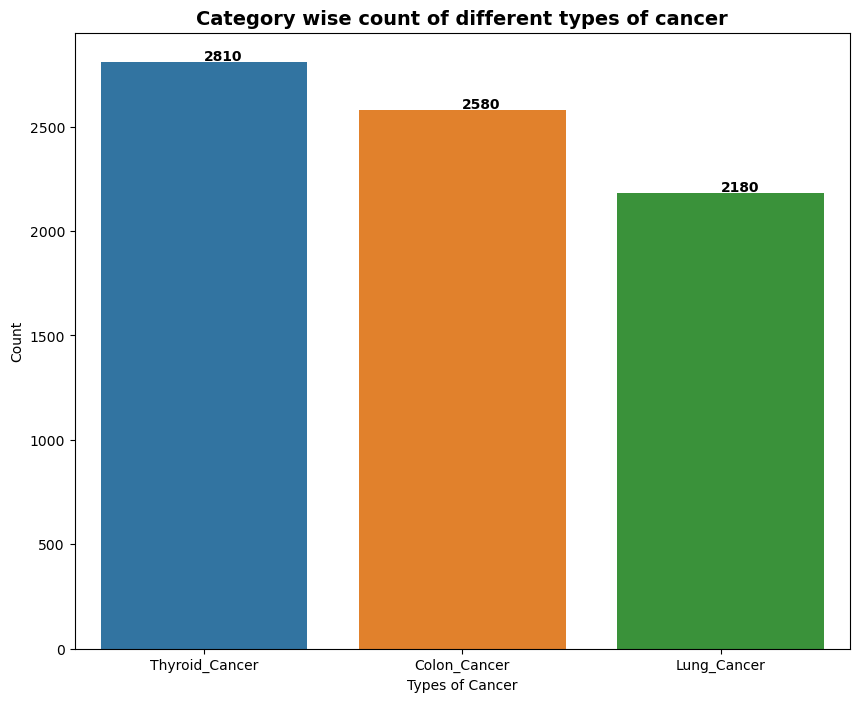

In [24]:
#plotting bar-plot of count.
plt.figure(figsize=(10,8))
plot = sns.barplot(x=cancer_types.index,y=cancer_types.values)
plt.xlabel("Types of Cancer")
plt.ylabel("Count")
plt.title("Category wise count of different types of cancer",
          fontweight='bold',
          fontsize='14')
for i,v in enumerate(cancer_types.values):
    plot.text(i,v+10,str(v),fontweight='bold')
plt.show()

In [25]:
import nltk
from nltk.corpus import stopwords         # to get a list of stopwords
from nltk.tokenize import word_tokenize   # for tokenization of words
from nltk.stem import WordNetLemmatizer   # to find root words
from string import punctuation            # to get a list of puncutation symbols

In [26]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [27]:
#removing stop words
stop_words = stopwords.words('english')
df['Research paper text'] = df['Research paper text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [28]:
df

,Cancer Category,Research paper text
0,Thyroid_Cancer,Thyroid surgery children single institution Os...
1,Thyroid_Cancer,""" The adopted strategy used prior years [] bas..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP skull uncommon clinic...
4,Thyroid_Cancer,This study aimed investigate serum matrix meta...
...,...,...
7565,Colon_Cancer,report case 24yearold man presented chief comp...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,heterogeneity cancer cells generally accepted ...
7568,Colon_Cancer,"""adipogenesis process mesenchymalstem cells ms..."


In [30]:
#remove punctutations
# Lemmatize the Text
import re
from nltk.stem import WordNetLemmatizer
df['Research paper text'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in df['Research paper text']]

In [31]:
df.head()

,Cancer Category,Research paper text
0,Thyroid_Cancer,Thyroid surgery children single institution Os...
1,Thyroid_Cancer,The adopted strategy used prior years based...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis b...
3,Thyroid_Cancer,Solitary plasmacytoma SP skull uncommon clinic...
4,Thyroid_Cancer,This study aimed investigate serum matrix meta...


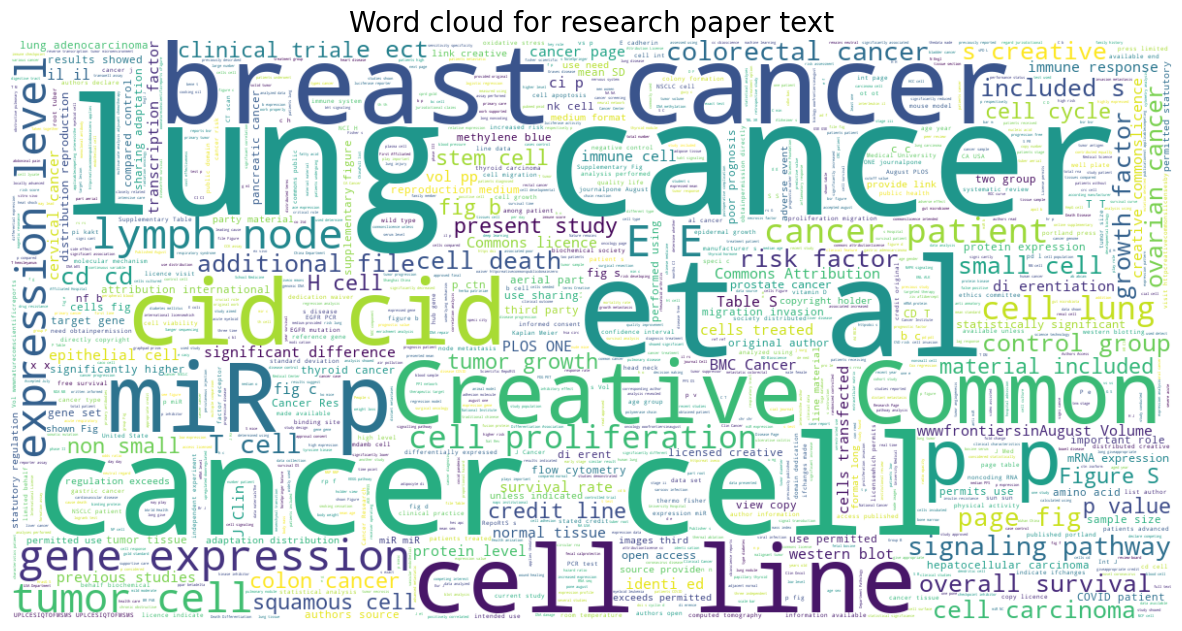

In [32]:
# creating a wordcloud
from wordcloud import WordCloud
data = df['Research paper text']
data_string = ' '.join(data)
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for research paper text',fontsize = 20)
plt.show()

In [35]:
#Label encoding for types of cancer
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Cancer Category'] = label_encoder.fit_transform(df['Cancer Category'])


In [36]:
df['Cancer Category'].unique()

array([2, 0, 1])

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [38]:
#splitting data
X=df["Research paper text"]
y=df["Cancer Category"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [41]:
X_train.shape

(5677,)

In [42]:
tfidf=TfidfVectorizer(max_df=0.95,max_features=1000,min_df = 10, stop_words="english",lowercase=True)
X_train = tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [57]:
X_train.shape

(5677, 1000)

In [74]:
X_train

<5677x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1644170 stored elements in Compressed Sparse Row format>

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [67]:
accuracy = {'TF-IDF':[]}


# Logistic Regression
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_train, y_train)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

# Decision Tree
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_train, y_train)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# Random Forest
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_train, y_train)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)




# Evaluation
model = ['Logistic','DT','RF']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)

In [59]:
a

0.34653988378235606

In [68]:
compare_models

,model,accuracy
0,Logistic,0.934496
1,DT,0.748019
2,RF,1.000000


In [50]:
compare_models["accuracy"].tolist()

[0.9344955097728473, 0.7480190174326465, 1.0, 0.34653988378235606]

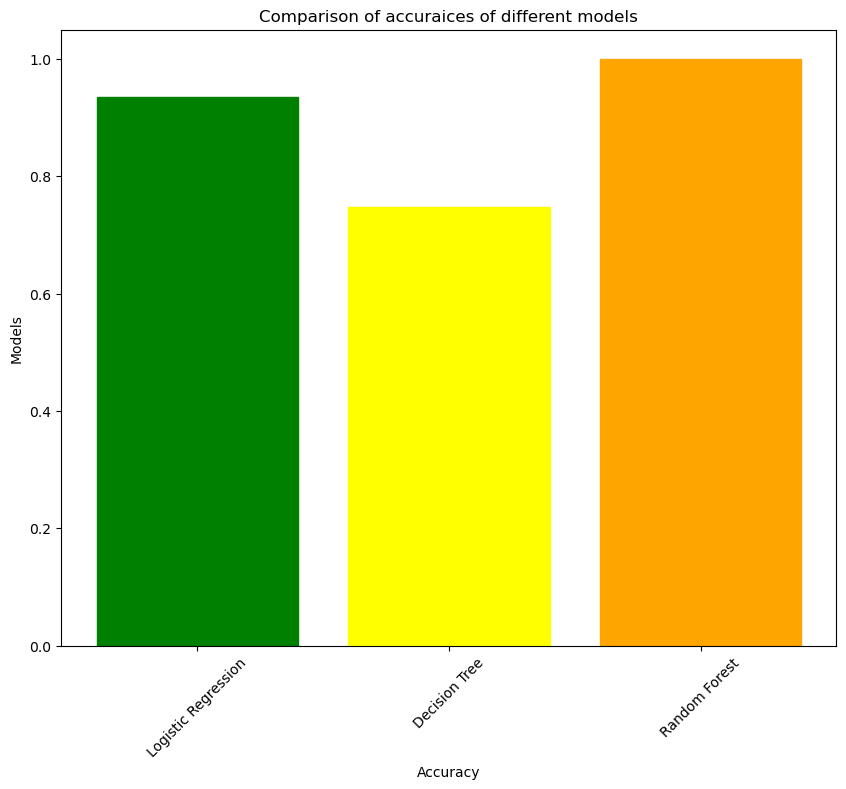

In [70]:
model = ['Logistic Regression','Decision Tree','Random Forest']
acc = compare_models["accuracy"].tolist()
plt.figure(figsize=(10,8))
graph = plt.bar(model,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models') 
plt.xticks(rotation=45)
plt.title("Comparison of accuraices of different models")
graph[0].set_color('green')
graph[1].set_color('yellow')
graph[2].set_color('orange')



In [62]:
# Random Forest
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_train, y_train)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

In [65]:
classes = ['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer']
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_predicted, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

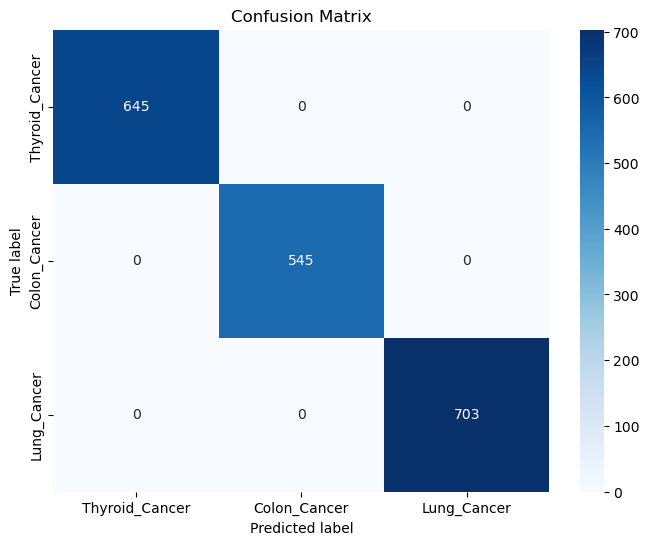

In [71]:
plot_confusion_matrix(y_test, y_predict_RF_tf)